In [1]:
## Importing all the python libraries and warnings 
import warnings
warnings.filterwarnings('ignore')
import pandas as pd, numpy as np         
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline



In [2]:
#Importing data file 
prev_app = pd.read_csv("previous_application.csv")
pd.set_option('display.max_columns', None)
prev_app1 = prev_app
prev_app1.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
#Checking shape of the data
prev_app1.shape

(1670214, 37)

In [4]:
prev_app1.dtypes

SK_ID_PREV                       int64
SK_ID_CURR                       int64
NAME_CONTRACT_TYPE              object
AMT_ANNUITY                    float64
AMT_APPLICATION                float64
AMT_CREDIT                     float64
AMT_DOWN_PAYMENT               float64
AMT_GOODS_PRICE                float64
WEEKDAY_APPR_PROCESS_START      object
HOUR_APPR_PROCESS_START          int64
FLAG_LAST_APPL_PER_CONTRACT     object
NFLAG_LAST_APPL_IN_DAY           int64
RATE_DOWN_PAYMENT              float64
RATE_INTEREST_PRIMARY          float64
RATE_INTEREST_PRIVILEGED       float64
NAME_CASH_LOAN_PURPOSE          object
NAME_CONTRACT_STATUS            object
DAYS_DECISION                    int64
NAME_PAYMENT_TYPE               object
CODE_REJECT_REASON              object
NAME_TYPE_SUITE                 object
NAME_CLIENT_TYPE                object
NAME_GOODS_CATEGORY             object
NAME_PORTFOLIO                  object
NAME_PRODUCT_TYPE               object
CHANNEL_TYPE             

In [5]:
#Checking null values
prev_app1.isnull().sum().sort_values(ascending = False)

RATE_INTEREST_PRIVILEGED       1664263
RATE_INTEREST_PRIMARY          1664263
AMT_DOWN_PAYMENT                895844
RATE_DOWN_PAYMENT               895844
NAME_TYPE_SUITE                 820405
NFLAG_INSURED_ON_APPROVAL       673065
DAYS_TERMINATION                673065
DAYS_LAST_DUE                   673065
DAYS_LAST_DUE_1ST_VERSION       673065
DAYS_FIRST_DUE                  673065
DAYS_FIRST_DRAWING              673065
AMT_GOODS_PRICE                 385515
AMT_ANNUITY                     372235
CNT_PAYMENT                     372230
PRODUCT_COMBINATION                346
AMT_CREDIT                           1
NAME_YIELD_GROUP                     0
NAME_PORTFOLIO                       0
NAME_SELLER_INDUSTRY                 0
SELLERPLACE_AREA                     0
CHANNEL_TYPE                         0
NAME_PRODUCT_TYPE                    0
SK_ID_PREV                           0
NAME_GOODS_CATEGORY                  0
NAME_CLIENT_TYPE                     0
CODE_REJECT_REASON       

In [6]:
## Checking missing value percentage is important
missing_perc = prev_app1.isnull().sum().sort_values(ascending=False)
pd.set_option('display.max_columns', None)

100*missing_perc/len(prev_app1)


RATE_INTEREST_PRIVILEGED       99.643698
RATE_INTEREST_PRIMARY          99.643698
AMT_DOWN_PAYMENT               53.636480
RATE_DOWN_PAYMENT              53.636480
NAME_TYPE_SUITE                49.119754
NFLAG_INSURED_ON_APPROVAL      40.298129
DAYS_TERMINATION               40.298129
DAYS_LAST_DUE                  40.298129
DAYS_LAST_DUE_1ST_VERSION      40.298129
DAYS_FIRST_DUE                 40.298129
DAYS_FIRST_DRAWING             40.298129
AMT_GOODS_PRICE                23.081773
AMT_ANNUITY                    22.286665
CNT_PAYMENT                    22.286366
PRODUCT_COMBINATION             0.020716
AMT_CREDIT                      0.000060
NAME_YIELD_GROUP                0.000000
NAME_PORTFOLIO                  0.000000
NAME_SELLER_INDUSTRY            0.000000
SELLERPLACE_AREA                0.000000
CHANNEL_TYPE                    0.000000
NAME_PRODUCT_TYPE               0.000000
SK_ID_PREV                      0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_CLIENT_TYPE

#### Dropping Columns having more than 40% null values 

In [7]:
prev_app1=prev_app1.drop(["RATE_INTEREST_PRIVILEGED"], axis=1)

In [8]:
prev_app1=prev_app1.drop(["RATE_INTEREST_PRIMARY"], axis=1)
prev_app1=prev_app1.drop(["AMT_DOWN_PAYMENT"], axis=1)
prev_app1=prev_app1.drop(["RATE_DOWN_PAYMENT"], axis=1)
prev_app1=prev_app1.drop(["NAME_TYPE_SUITE"], axis=1)
prev_app1=prev_app1.drop(["NFLAG_INSURED_ON_APPROVAL"], axis=1)
prev_app1=prev_app1.drop(["DAYS_TERMINATION"], axis=1)
prev_app1=prev_app1.drop(["DAYS_LAST_DUE"], axis=1)
prev_app1=prev_app1.drop(["DAYS_LAST_DUE_1ST_VERSION"], axis=1)
prev_app1=prev_app1.drop(["DAYS_FIRST_DUE"], axis=1)
prev_app1=prev_app1.drop(["DAYS_FIRST_DRAWING"], axis=1)

In [9]:
prev_app1.shape

(1670214, 26)

In [10]:
missing_perc = prev_app1.isnull().sum().sort_values(ascending=False)
pd.set_option('display.max_columns', None)

100*missing_perc/len(prev_app1)


AMT_GOODS_PRICE                23.081773
AMT_ANNUITY                    22.286665
CNT_PAYMENT                    22.286366
PRODUCT_COMBINATION             0.020716
AMT_CREDIT                      0.000060
CODE_REJECT_REASON              0.000000
NAME_YIELD_GROUP                0.000000
NAME_SELLER_INDUSTRY            0.000000
SELLERPLACE_AREA                0.000000
CHANNEL_TYPE                    0.000000
NAME_PRODUCT_TYPE               0.000000
NAME_PORTFOLIO                  0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_CLIENT_TYPE                0.000000
SK_ID_PREV                      0.000000
NAME_PAYMENT_TYPE               0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_STATUS            0.000000
NAME_CASH_LOAN_PURPOSE          0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
HOUR_APPR_PROCESS_START         0.000000
WEEKDAY_APPR_PROCESS_START      0.000000
AMT_APPLICATION                 0.000000
NAME_CONTRACT_TY

In [11]:
## After dropping, treating less than 40% percentage missing values with mean/median/mode
prev_app1["AMT_GOODS_PRICE"].values

array([ 17145., 607500., 112500., ..., 105237., 180000., 360000.])

In [12]:
prev_app1 = prev_app1.fillna(prev_app1["AMT_GOODS_PRICE"].median())

In [13]:
prev_app1["AMT_ANNUITY"].values


array([ 1730.43 , 25188.615, 15060.735, ..., 11520.855, 18821.52 ,
       16431.3  ])

In [14]:
prev_app1 = prev_app1.fillna(prev_app1["AMT_ANNUITY"].median())

In [15]:
prev_app1["CNT_PAYMENT"].values


array([12., 36., 12., ..., 10., 12., 48.])

In [16]:
prev_app1 = prev_app1.fillna(prev_app1["CNT_PAYMENT"].median())

In [17]:
# Checking null values again after treating all the null values, to reconfirm that all the null values have been treated 
prev_app1.isnull().sum()

SK_ID_PREV                     0
SK_ID_CURR                     0
NAME_CONTRACT_TYPE             0
AMT_ANNUITY                    0
AMT_APPLICATION                0
AMT_CREDIT                     0
AMT_GOODS_PRICE                0
WEEKDAY_APPR_PROCESS_START     0
HOUR_APPR_PROCESS_START        0
FLAG_LAST_APPL_PER_CONTRACT    0
NFLAG_LAST_APPL_IN_DAY         0
NAME_CASH_LOAN_PURPOSE         0
NAME_CONTRACT_STATUS           0
DAYS_DECISION                  0
NAME_PAYMENT_TYPE              0
CODE_REJECT_REASON             0
NAME_CLIENT_TYPE               0
NAME_GOODS_CATEGORY            0
NAME_PORTFOLIO                 0
NAME_PRODUCT_TYPE              0
CHANNEL_TYPE                   0
SELLERPLACE_AREA               0
NAME_SELLER_INDUSTRY           0
CNT_PAYMENT                    0
NAME_YIELD_GROUP               0
PRODUCT_COMBINATION            0
dtype: int64

In [18]:
#Checking for duplicates if any
prev_app1 = prev_app1.drop_duplicates()

In [19]:
prev_app1.shape

(1670214, 26)

In [20]:
def outlier_identification(data_column):
    a = np.array(sorted(data_column))
    first,third = np.percentile(a,[25,75])
    IQR = third-first
    lower_range = first-(1.5 * IQR)
    upper_range = third+(1.5 * IQR)
    return lower_range,upper_range


In [21]:
lowerbound,upperbound = outlier_identification(prev_app1["AMT_ANNUITY"])

In [22]:
outlier_list = []
for i in range(prev_app1.shape[0]):
    if prev_app1["AMT_ANNUITY"][i]<lowerbound or prev_app1["AMT_ANNUITY"][i]>upperbound:
        outlier_list.append(prev_app1["AMT_ANNUITY"][i])
    else:
        pass
print(len(outlier_list))


1588


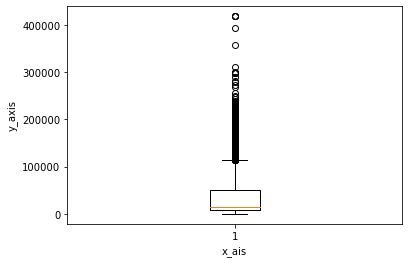

In [23]:
plt.boxplot(prev_app1["AMT_ANNUITY"])
plt.xlabel("x_ais")
plt.ylabel("y_axis")
plt.show()

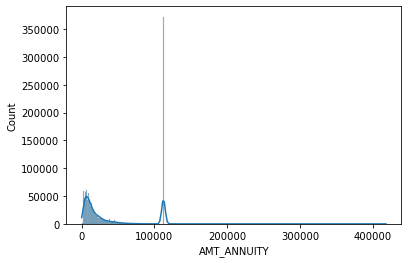

In [24]:
sns.histplot(data = prev_app1, x = prev_app1["AMT_ANNUITY"], kde = True)
plt.show()

In [33]:
prev_app1.corr()>0.5

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT
SK_ID_PREV,True,False,False,False,False,False,False,False,False,False,False
SK_ID_CURR,False,True,False,False,False,False,False,False,False,False,False
AMT_ANNUITY,False,False,True,False,False,False,False,False,False,False,True
AMT_APPLICATION,False,False,False,True,True,True,False,False,False,False,False
AMT_CREDIT,False,False,False,True,True,True,False,False,False,False,False
AMT_GOODS_PRICE,False,False,False,True,True,True,False,False,False,False,False
HOUR_APPR_PROCESS_START,False,False,False,False,False,False,True,False,False,False,False
NFLAG_LAST_APPL_IN_DAY,False,False,False,False,False,False,False,True,False,False,False
DAYS_DECISION,False,False,False,False,False,False,False,False,True,False,False
SELLERPLACE_AREA,False,False,False,False,False,False,False,False,False,True,False
